Univariate stats

In [ ]:
def univariate_stats(data):
  import pandas as pd
  df_mean = pd.DataFrame(data.mean())
  df_count = pd.DataFrame(data.count())
  df_median = pd.DataFrame(data.median())
  df_quantile25 = pd.DataFrame(data.quantile(0.25))
  df_quantile50 = pd.DataFrame(data.quantile(0.5))
  df_quantile75 = pd.DataFrame(data.quantile(0.75))
  df_mode = pd.DataFrame(data.mode())
  df_mode_new = df_mode[:2]
  df_mode_final = df_mode_new.T
  df_min = pd.DataFrame(data.min())
  df_max = pd.DataFrame(data.max())
  df_std = pd.DataFrame(data.std())
  df_kurtosis = pd.DataFrame(data.kurt())
  df_skew = pd.DataFrame(data.skew())
  frames = [df_count, df_quantile25, df_quantile50, df_quantile75, df_mean, df_median, df_mode_final, df_min, df_max, df_std, df_kurtosis, df_skew]
  result = pd.concat(frames, axis=1)
  result.columns = ['Count', '1st Quartile', '2nd Quartile', '3rd Quartile', 'Mean', 'Median', 'Mode1', 'Mode2', 'Min', 'Max', 'Standard Deviation', 'Kurtosis', 'Skewness']
  pd.set_option('display.max_columns', None)
  print(result)

In [ ]:
def univariate_vis(dataframe):
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt

  for col in dataframe:#, ax in enumerate():
    if pd.api.types.is_numeric_dtype(dataframe[col]):
      print(col)
      text =  'Std dev: ' + str(round(dataframe[col].std(), 2)) + '\n'
      text += 'Mean: ' + str(round(dataframe[col].mean(), 2)) + '\n'
      text += 'Skew: ' + str(round(dataframe[col].skew(), 2)) + '\n'
      text += 'Kurt: ' + str(round(dataframe[col].kurt(), 2))

      sns.displot(dataframe[col])
      plt.title(col + " histogram")
      plt.text(0.95, 0.2, text, fontsize=10, transform=plt.gcf().transFigure)
      #plt.draw()
      plt.gcf().savefig('drive/MyDrive/Colab Notebooks/' + col + ' histogram', bbox_inches='tight')  
      plt.show()

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0
       Count  1st Quartile  2nd Quartile  3rd Quartile        Mean  Median  \
X        517           NaN           NaN           NaN         inf    4.00   
Y        517           NaN           NaN           NaN         inf    4.00   
month    517           NaN           NaN           NaN         NaN     NaN   
day      517           NaN           NaN           NaN         NaN     NaN   
FFMC     517          90.2         91.60         92.90   90.644681   91.60   
DMC      517          68.6        108.30        142.40  110.872340  108.30   
DC       517         437.7        664.20        713.90  547.9400

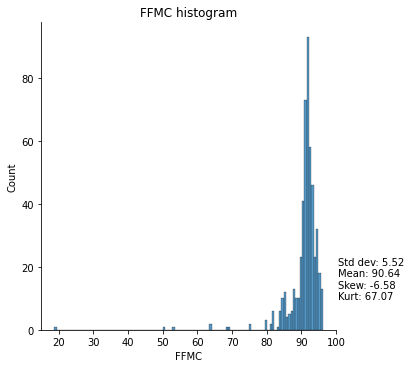

DMC


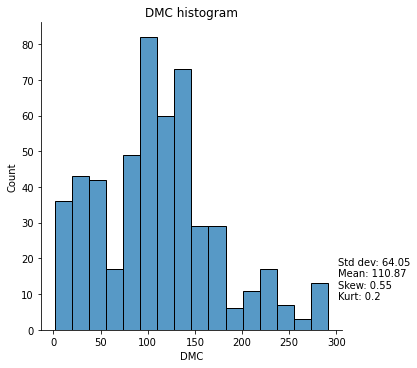

DC


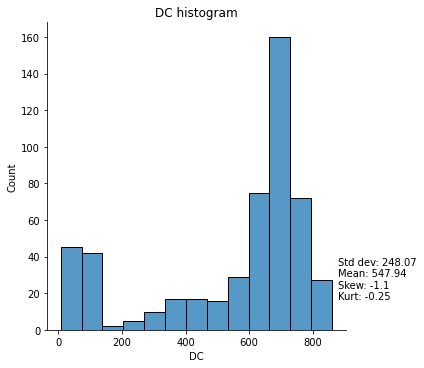

ISI


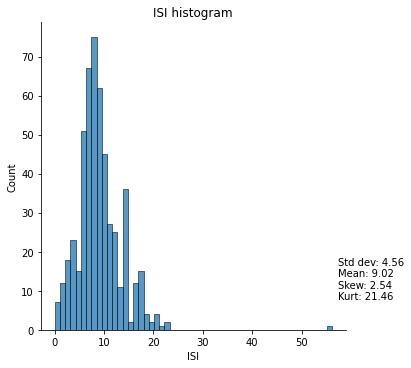

temp


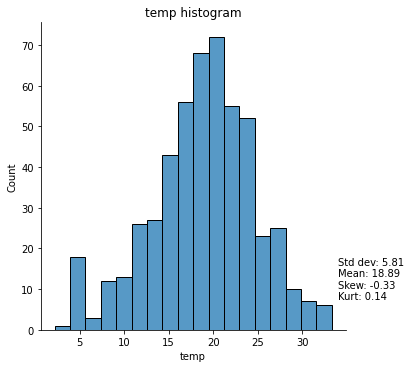

RH


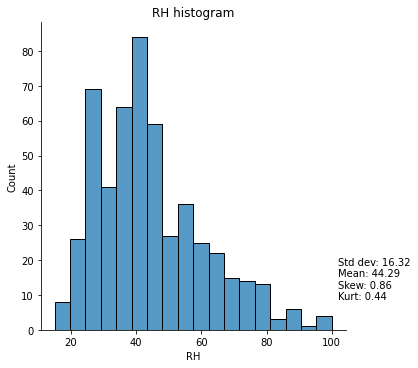

wind


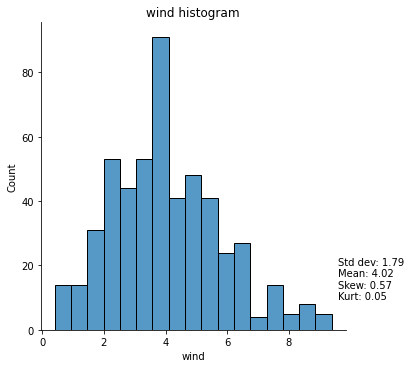

area


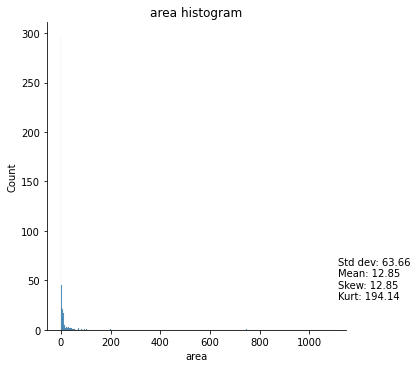

In [ ]:
import pandas as pd
fresh_data = pd.read_csv("drive/MyDrive/Colab Notebooks/New Data/forestfires.csv")
# Change these variables to str becuase we will be analyzing them using num/cat statistics
fresh_data['X'] = fresh_data['X'].astype(str)
fresh_data['Y'] = fresh_data['Y'].astype(str)
fresh_data.drop(['rain'], axis=1, inplace=True)

# Define univariate stat and visualization function
def univariate_stats_and_vis(dataframe):
  print(dataframe.head())
  univariate_stats(dataframe)
  univariate_vis(dataframe)

# Run univariate statist and visualization function (before data cleaning)
univariate_stats_and_vis(fresh_data)

No need to find missing values because we can see from the univariate statistics that all of variables have the same count number.

We will, however, want to correct for skewness because several variables are quite skewed. This will hopefully also minimize the amount of ouliers that we have. 

Next I will run the bivariate stats and visualisations and show them before and after data cleaning.



          r  p-value
FFMC  0.040    0.363
DMC   0.073    0.097
DC    0.049    0.262
ISI   0.008    0.851
temp  0.098    0.026
RH   -0.076    0.086
wind  0.012    0.780
area  1.000    0.000


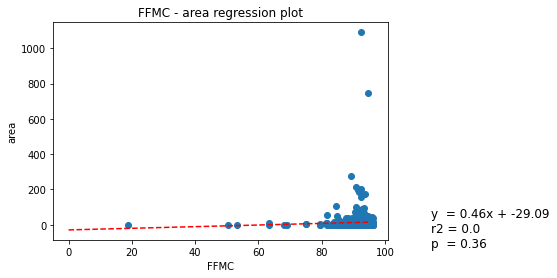

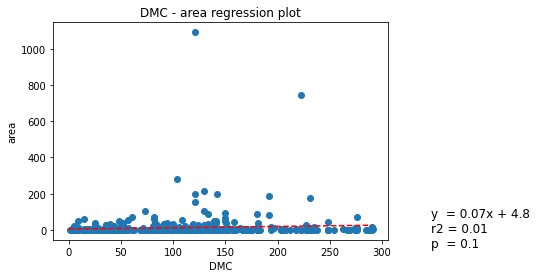

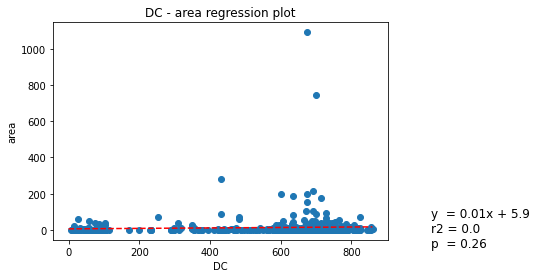

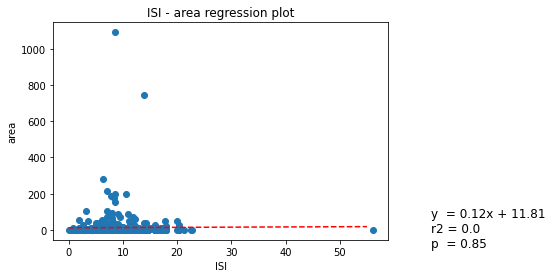

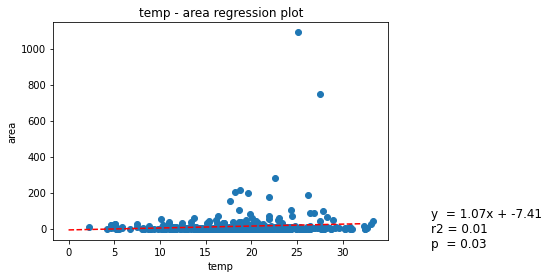

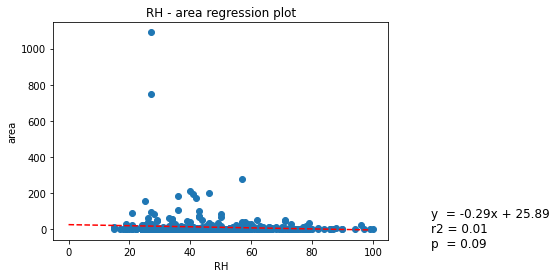

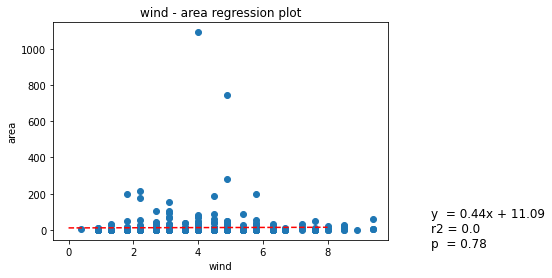

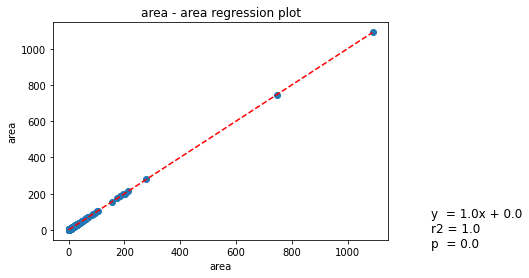

Heteroscedsticity for X
               LM stat  LM p-value  F-stat  F p-value
White            4.653       0.794   0.577      0.797
Breusch-Pagan    4.653       0.794   0.577      0.797


Heteroscedsticity for Y
               LM stat  LM p-value  F-stat  F p-value
White            2.747        0.84   0.454      0.842
Breusch-Pagan    2.747        0.84   0.454      0.842


Heteroscedsticity for month
               LM stat  LM p-value  F-stat  F p-value
White            1.371         1.0   0.122        1.0
Breusch-Pagan    1.371         1.0   0.122        1.0


Heteroscedsticity for day
               LM stat  LM p-value  F-stat  F p-value
White            5.069       0.535   0.842      0.538
Breusch-Pagan    5.069       0.535   0.842      0.538


Heteroscedsticity for FFMC
               LM stat  LM p-value  F-stat  F p-value
White            0.787       0.675   0.392      0.676
Breusch-Pagan    0.419       0.518   0.417      0.519


Heteroscedsticity for DMC
               LM stat  L

In [ ]:
# Code for all num/num stats and visualisations

def corr_table(dataframe, label):
  from scipy import stats
  import pandas as pd
  # Create empty DataFrame to store correlations and p-vlues
  corr_df = pd.DataFrame(columns=['r', 'p-value'])

  for col in dataframe:
    if pd.api.types.is_numeric_dtype(dataframe[col]):
      r, p = stats.pearsonr(dataframe[label], dataframe[col])
      corr_df.loc[col] = [round(r, 3), round(p, 3)]
  
  print(corr_df)

def regression_plots(dataframe, label):
  #import seaborn as sns
  #  sns.set(color_codes=True)
  #  sns.jointplot(x=col, y=label, data=dataframe)
  import pandas as pd
  from matplotlib import pyplot as plt
  from scipy import stats
  for col in dataframe:
    if pd.api.types.is_numeric_dtype(fresh_data[col]):
      plt.scatter(dataframe[col], dataframe[label])
      plt.title(col + ' - ' + label + ' regression plot')
      plt.xlabel(col)
      plt.ylabel(label)
    
      # Calculate the regression line
      m, b, r, p, err = stats.linregress(dataframe[col], dataframe[label])

      # Create the index used for the line plot by using the range function from 
      # zero to the max value of the numeric feature
      num = int(dataframe[col].max())
      nums = range(num)

      # This line plot requires(index list, slope * index list + y-intercept, line format)
      # For a complete list of line formats: https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
      plt.plot(nums,m * nums + b,"r--")

      # Add the formula, r squared, and p-value to the figure
      textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
      textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
      textstr += 'p  = ' + str(round(p, 2))
      plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
      plt.gcf().savefig('drive/MyDrive/Colab Notebooks/' + col + ' regression plot', bbox_inches='tight')
      plt.show()




def heteroscedasticity_tests(dataframe, label):
  from statsmodels.stats.diagnostic import het_breuschpagan
  from statsmodels.stats.diagnostic import het_white
  import pandas as pd
  import statsmodels.api as sm
  from statsmodels.formula.api import ols
    
   
  # Fit the OLS model
  for col in dataframe:
    model = ols(formula='dataframe[label]~dataframe[col]', data=dataframe).fit()
  
  #model = ols(formula=)

    white_test = het_white(model.resid,  model.model.exog)
    bp_test = het_breuschpagan(model.resid, model.model.exog)
   
    output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
    output_df.loc['White'] = white_test
    output_df.loc['Breusch-Pagan'] = bp_test
    
    print(f'Heteroscedsticity for {col}')
    print(output_df.round(3))
    print('\n')

# Define function for Bivariate stats and visualizations for num/num
def num_num_stats_vis(dataframe, label):
  corr_table_before_cleaning = corr_table(dataframe, label)
  regression_plots(dataframe, label)
  heteroscedasticity_tests(dataframe, label)

num_num_stats_vis(fresh_data, 'area')

X
area


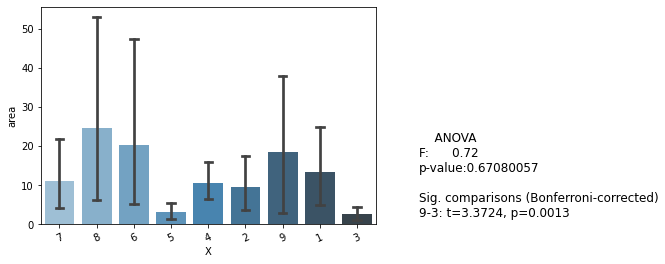

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Y
area


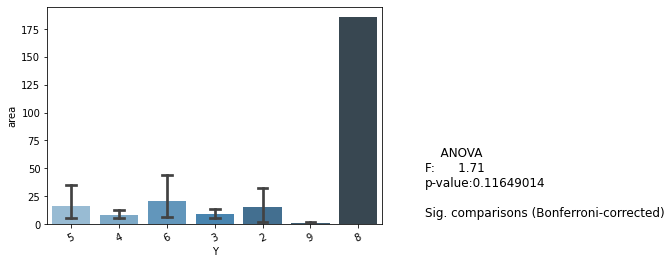

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


month
area


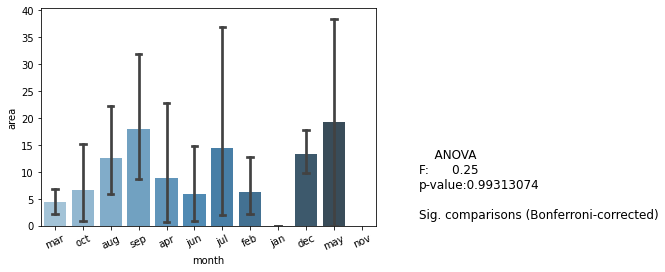

day
area


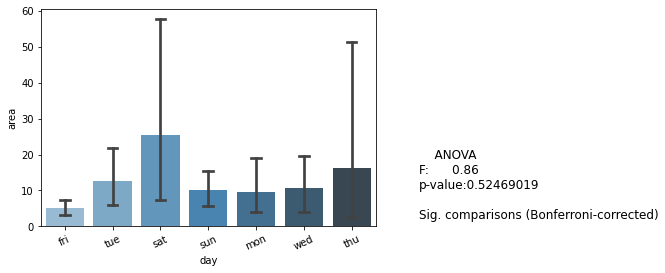

In [ ]:
# Code for all num/cat stats and visualisations
def anova_test_viz(dataframe, label):
  import pandas as pd
  import seaborn as sns
  import numpy as np
  from scipy import stats
  import statistics as stat
  import matplotlib.pyplot as plt

  
  for col in dataframe:
    if not pd.api.types.is_numeric_dtype(fresh_data[col]):
      # Create list of groups for ANOVA
      groups = dataframe[col].unique()
      df_grouped = dataframe.groupby(col)
      group_labels = []
      for group in groups:
        group_list = df_grouped.get_group(group)
        group_labels.append(group_list[label])

      # Perform ANOVA
      oneway = stats.f_oneway(*group_labels)
      unique_groups = dataframe[col].unique()
      ttests = []

      # Find ttests that are significant
      for i, group in enumerate(unique_groups):
        for i2, group_2 in enumerate(unique_groups):
          if i2 > i:
            type_1 = dataframe[dataframe[col] == group]
            type_2 = dataframe[dataframe[col] == group_2]
            t, p = stats.ttest_ind(type_1[label], type_2[label])
            # Add ttests to list
            ttests.append([group, group_2, t.round(4), p.round(4)])

      # Set threshold
      p_threshold = 0.05 / len(ttests)

      # Print out ttests below p-value threshold

      textstr = '    ANOVA' + '\n'
      textstr += 'F:      ' + str(oneway[0].round(2)) + '\n'
      textstr += 'p-value:' + str(oneway[1].round(8)) + '\n\n'
      textstr += 'Sig. comparisons (Bonferroni-corrected)' + '\n'

      for ttest in ttests:
        if ttest[3] <= p_threshold:
          textstr += str(ttest[0]) + '-' + str(ttest[1]) + ': t=' + str(ttest[2]) + ', p=' +str(ttest[3]) + '\n'


      x = col
      print(x)
      y = label
      print(y)
      # Create chart to visualize relationships between groups
      plt.figure(figsize=(6, 4))
      plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
      graph = sns.barplot(x=col, y=label, data=dataframe, capsize=0.2, palette='Blues_d');
      graph.set_xticklabels(graph.get_xticklabels(), rotation=25);
      plt.savefig('drive/MyDrive/Colab Notebooks/' + col + 'avona.png', bbox_inches='tight')
      plt.show()

anova_test_viz(fresh_data, 'area')

In [ ]:
def correct_neg_skew(dataframe):
  import seaborn as sns
  import matplotlib.pyplot as plt
  for col in dataframe:
    if pd.api.types.is_numeric_dtype(dataframe[col]):
      tuned_list = dataframe[col]
      i = 2
      if tuned_list.skew() < 0:
        while tuned_list.skew() < 0:
          tuned_list = dataframe[col]**i
          i+=0.001
      
        print(f'The optimal exponential transformation is x**{round(i, 3)} \n')
        dataframe[col + str(round(i, 4))] = dataframe[col]**i
        print(f'Skewness \n{dataframe.skew()} \n')
        sns.distplot(dataframe[col + str(round(i, 4))]);
        plt.show()

#fresh_data_2 = pd.read_csv("drive/MyDrive/Colab Notebooks/New Data/forestfires.csv")
#correct_neg_skew(fresh_data)
#print(fresh_data_2['FFMC'].skew())

In [ ]:
def bin_numeric(series):
  from scipy.stats import norm
  import numpy as np

  # Determine the appropriate number of bins:
  bins = int(2*len(list(series))**(3/5))

  # Determine the cutoffs/edges of each bin based on a normal distribution
  edges = np.linspace(-3, 3, bins)
  edges = norm.cdf(edges)
  edges = list(np.quantile(series, edges))
  edges.append(max(series))

  # Update each actual value of MiscVal to the largest bin edge that it is less than
  new_series = []               # Create empty list to store new values
  for value in list(series):    # Loop through original list one-at-a-time
    for edge in edges:          # For each original list value, loop through a list of sorted-ascending edges
      if value <= edge:         # As soon as we find an edge value less than the original...
        new_series.append(edges.index(edge)) # ..., add the rank-order of the edge to the new list
        break                   # Break out of the loop since we found our edge

  return [bins, edges, new_series]

In [ ]:
import numpy as np

test_data = pd.read_csv("drive/MyDrive/Colab Notebooks/New Data/forestfires.csv")

test_data['ISI_SR'] = np.sqrt(test_data['ISI'])
test_data['ISI_CR'] = np.cbrt(test_data['ISI'])
test_data['ISI_LN'] = np.log(test_data['ISI'])
test_data['ISI_Log2'] = np.log2(test_data['ISI'])
test_data['ISI_Log10'] = np.log10(test_data['ISI'])

test_data['area_SR'] = np.sqrt(test_data['area'])
test_data['area_CR'] = np.cbrt(test_data['area'])
test_data['area_LN'] = np.log(test_data['area'])
test_data['area_Log2'] = np.log2(test_data['area'])
test_data['area_Log10'] = np.log10(test_data['area'])


test_data.skew()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


X              0.036246
Y              0.417296
FFMC          -6.575606
DMC            0.547498
DC            -1.100445
ISI            2.536325
temp          -0.331172
RH             0.862904
wind           0.571001
rain          19.816344
area          12.846934
ISI_SR         0.148037
ISI_CR        -0.592935
ISI_LN              NaN
ISI_Log2            NaN
ISI_Log10           NaN
area_SR        4.338705
area_CR        1.833619
area_LN             NaN
area_Log2           NaN
area_Log10          NaN
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


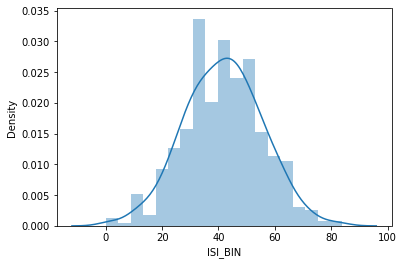

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


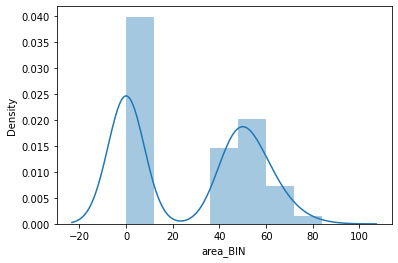

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


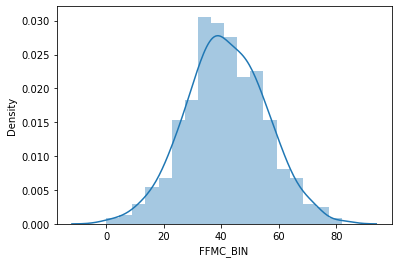

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


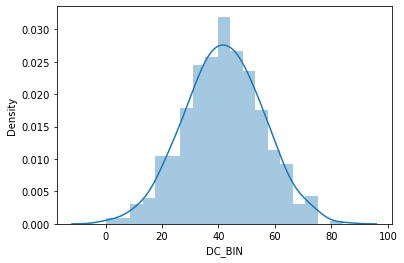

X            0.036246
Y            0.417296
FFMC        -6.575606
DMC          0.547498
DC          -1.100445
ISI          2.536325
temp        -0.331172
RH           0.862904
wind         0.571001
area        12.846934
ISI_BIN     -0.018164
area_BIN     0.080317
FFMC_BIN    -0.016101
DC_BIN      -0.041914
dtype: float64
     X  Y month  day  FFMC    DMC  DC  ISI  temp  RH  wind  area
138  9  9   jul  tue    24   48.3  30   24  18.0  42   2.7    42
139  1  4   sep  tue    36  129.5  48   34  21.7  38   2.2    42
140  2  5   sep  mon    35  126.5  46   34  21.9  39   1.8    42
141  1  2   aug  wed    69   99.9  34   55  23.3  31   4.5    42
142  8  6   aug  fri    31  108.0  35   54  21.2  51   8.9    42


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fresh_data_3 = pd.read_csv("drive/MyDrive/Colab Notebooks/New Data/forestfires.csv")
fresh_data_3.drop(['rain'], axis=1, inplace=True)
#fresh_data_3 = fresh_data_3[['ISI', 'rain', 'area']]
  
fresh_data_3['ISI_BIN'] = bin_numeric(fresh_data_3.ISI)[2]
sns.distplot(fresh_data_3['ISI_BIN']);
plt.show()

fresh_data_3['area_BIN'] = bin_numeric(fresh_data_3.area)[2]
sns.distplot(fresh_data_3['area_BIN']);
plt.show()

fresh_data_3['FFMC_BIN'] = bin_numeric(fresh_data_3.FFMC)[2]
sns.distplot(fresh_data_3['FFMC_BIN']);
plt.show()

fresh_data_3['DC_BIN'] = bin_numeric(fresh_data_3.DC)[2]
sns.distplot(fresh_data_3['DC_BIN']);
plt.show()

print(fresh_data_3.skew())

new_data = fresh_data
new_data['ISI'] = fresh_data_3['ISI_BIN']
new_data['area'] = fresh_data_3['area_BIN']
new_data['FFMC'] = fresh_data_3['FFMC_BIN']
new_data['DC'] = fresh_data_3['DC_BIN']
print(new_data.head())

Because the variable 'rain' has only 8 values that are not 0, I have decided to drop this variable becuase it will not help us with our analysis. Apparently, it doesn't rain a lot in this area, so rain doesn't play a significant role. 

Keep "outliers" for Y becuase they are a categorical variable.
Keep outliers for 

In [ ]:
def print_outliers(dataframe): 
  import seaborn as sns
  import matplotlib.pyplot as plt
  import pandas as pd

  outliers = pd.DataFrame(columns=['min', 'count below', 'max', 'count above'])

  # Loop through each column in the dataframe except those that are: 1) categorical, 2) empty, or 3) binary (0/1)
  for col in dataframe:
    if pd.api.types.is_numeric_dtype(dataframe[col]) and (len(dataframe[col].value_counts()) > 0) and not all(dataframe[col].value_counts().index.isin([0, 1])):
      # Calculate the theoretical min/max
      min = dataframe[col].mean() - (dataframe[col].std() * 3)
      max = dataframe[col].mean() + (dataframe[col].std() * 3)
      outliers.loc[col] = (min, dataframe[col][dataframe[col] < min].count(), max, dataframe[col][dataframe[col] > max].count())

  # Let's take a look to make sure it works
  print(outliers)

  #print(data.skew())

  #print(plt.boxplot(data.temp))
  #for col in data:
  #  print(plt.boxplot(data[col]))
  #print(sns.displot(data.temp))
  #print(sns.displot(data.wind))
  #for column in data:
  #  print(sns.displot(data[column]))

print_outliers(new_data)

            min  count below         max  count above
FFMC   0.215053          1.0   82.879725          0.0
DMC  -81.267106          0.0  303.011787          0.0
DC     0.290540          1.0   83.322612          1.0
ISI   -0.191410          0.0   83.487348          1.0
temp   1.469292          0.0   36.309044          0.0
RH    -4.664207          0.0   93.240609          5.0
wind  -1.357356          0.0    9.392559          4.0
area -53.566203          0.0  108.494636          0.0


In [ ]:
import pandas as pd
#data = pd.read_csv("drive/MyDrive/Colab Notebooks/New Data/forestfires.csv")

def find_missing_vals(dataframe):
  print(dataframe.isnull().sum())
  print(dataframe.isnull().sum().sum())
find_missing_vals(fresh_data)

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
area     0
dtype: int64
0


I rechecked to see if there were any missing values. Since there are no missing values, I will go ahead and not include the process of replacing missing variables.

          r  p-value
FFMC  0.046    0.292
DMC   0.068    0.122
DC    0.079    0.074
ISI   0.041    0.355
temp  0.074    0.095
RH   -0.044    0.322
wind  0.063    0.155
area  1.000    0.000


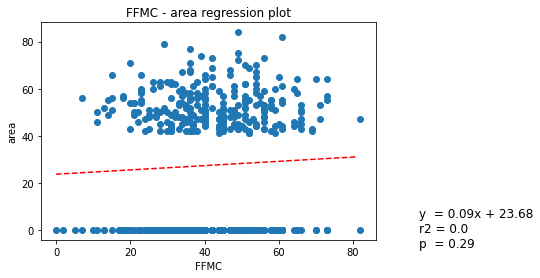

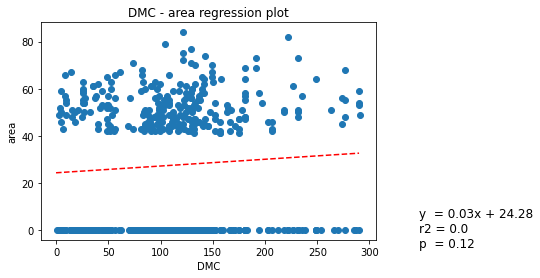

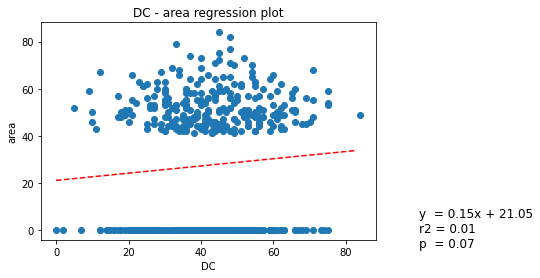

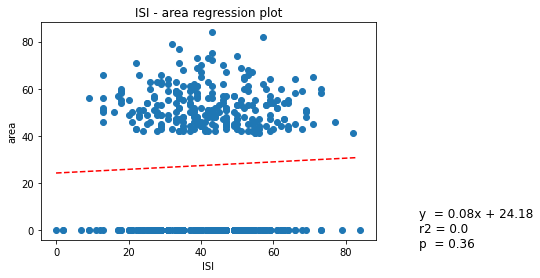

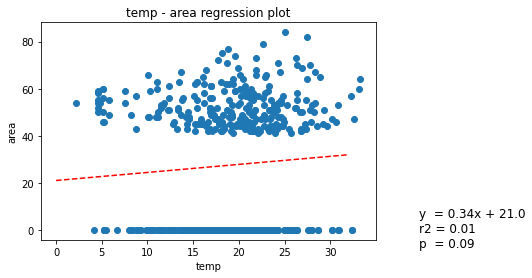

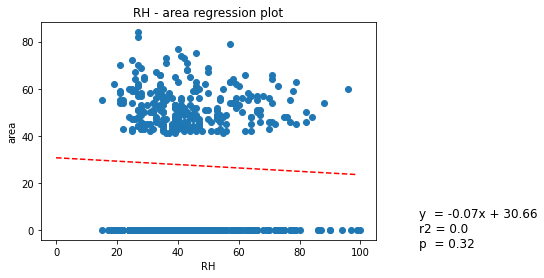

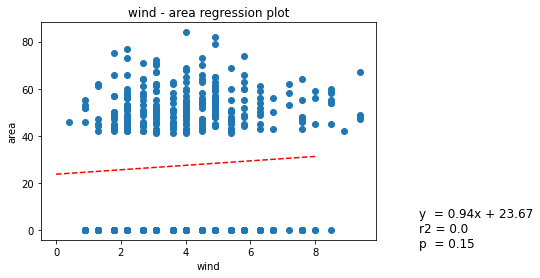

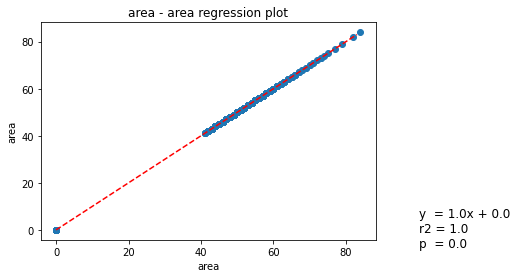

Heteroscedsticity for X
               LM stat  LM p-value  F-stat  F p-value
White           14.398       0.072   1.819      0.071
Breusch-Pagan   14.398       0.072   1.819      0.071


Heteroscedsticity for Y
               LM stat  LM p-value  F-stat  F p-value
White            7.699       0.261   1.285      0.262
Breusch-Pagan    7.699       0.261   1.285      0.262


Heteroscedsticity for month
               LM stat  LM p-value  F-stat  F p-value
White            37.79         0.0    3.62        0.0
Breusch-Pagan    37.79         0.0    3.62        0.0


Heteroscedsticity for day
               LM stat  LM p-value  F-stat  F p-value
White            6.569       0.363   1.094      0.365
Breusch-Pagan    6.569       0.363   1.094      0.365


Heteroscedsticity for FFMC
               LM stat  LM p-value  F-stat  F p-value
White            0.254       0.881   0.126      0.882
Breusch-Pagan    0.046       0.830   0.046      0.831


Heteroscedsticity for DMC
               LM stat  L

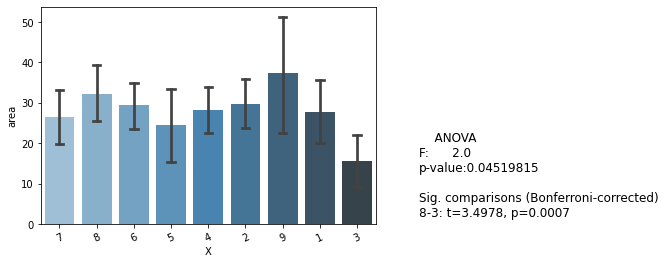

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Y
area


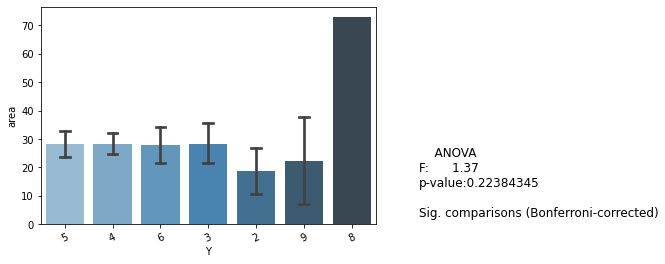

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


month
area


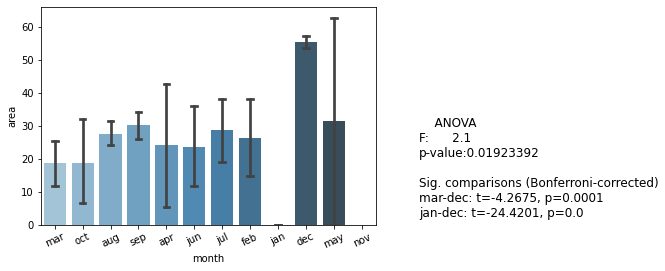

day
area


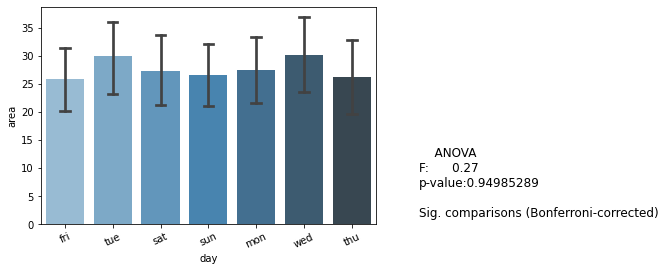

In [ ]:
num_num_stats_vis(new_data, 'area')
anova_test_viz(new_data, 'area')

          r  p-value
FFMC -0.029    0.633
DMC   0.045    0.463
DC    0.002    0.976
ISI  -0.085    0.162
temp -0.003    0.964
RH   -0.059    0.337
wind  0.049    0.427
area  1.000    0.000


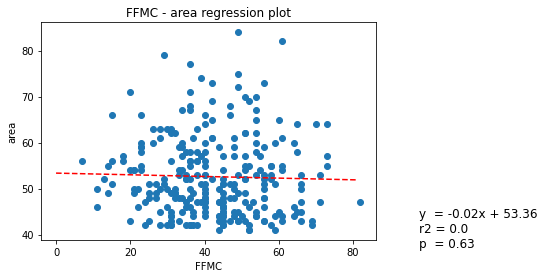

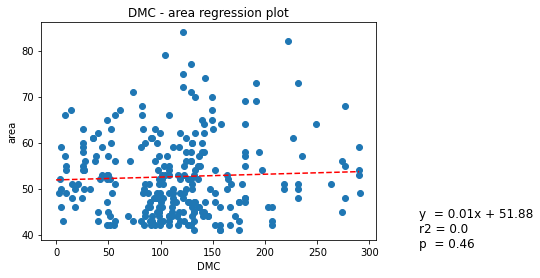

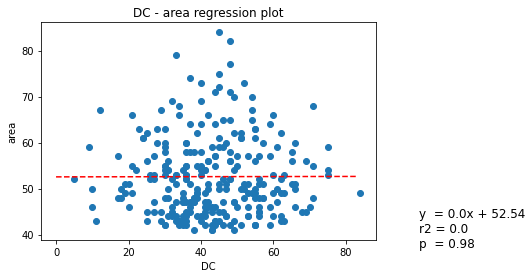

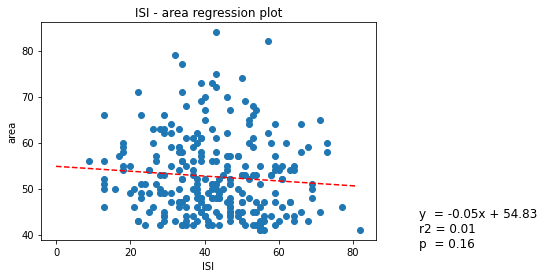

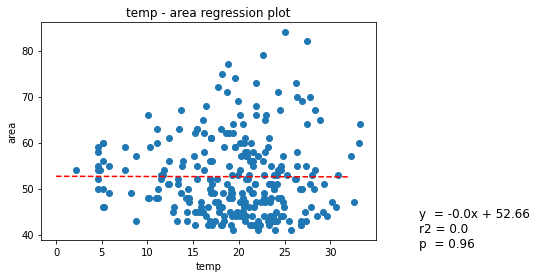

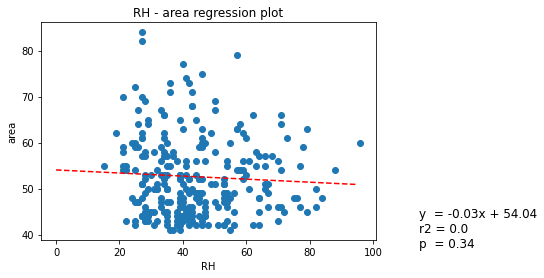

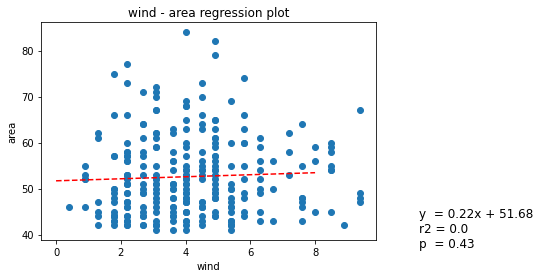

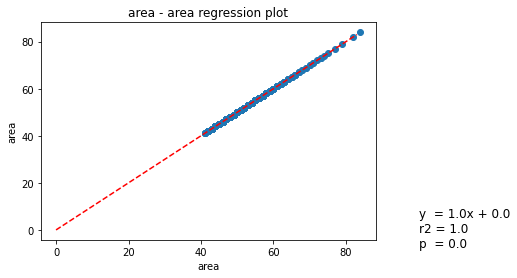

Heteroscedsticity for X
               LM stat  LM p-value  F-stat  F p-value
White            8.399       0.395   1.048      0.401
Breusch-Pagan    8.399       0.395   1.048      0.401


Heteroscedsticity for Y
               LM stat  LM p-value  F-stat  F p-value
White            8.341       0.214   1.397      0.216
Breusch-Pagan    8.341       0.214   1.397      0.216


Heteroscedsticity for month
               LM stat  LM p-value  F-stat  F p-value
White            6.885       0.649   0.756      0.657
Breusch-Pagan    6.885       0.649   0.756      0.657


Heteroscedsticity for day
               LM stat  LM p-value  F-stat  F p-value
White            5.213       0.517   0.863      0.523
Breusch-Pagan    5.213       0.517   0.863      0.523


Heteroscedsticity for FFMC
               LM stat  LM p-value  F-stat  F p-value
White            3.229       0.199   1.616      0.201
Breusch-Pagan    1.457       0.227   1.454      0.229


Heteroscedsticity for DMC
               LM stat  L

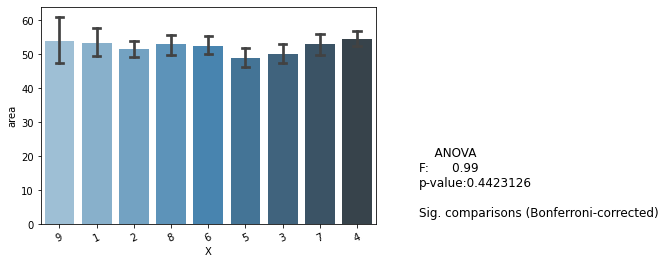

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Y
area


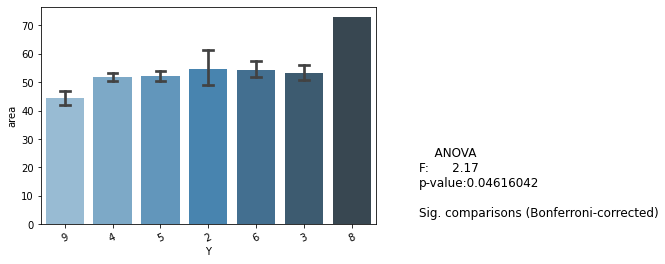

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


month
area


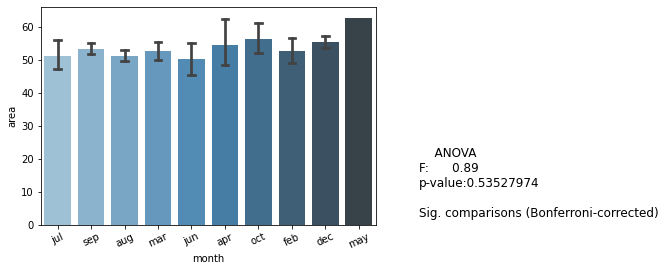

day
area


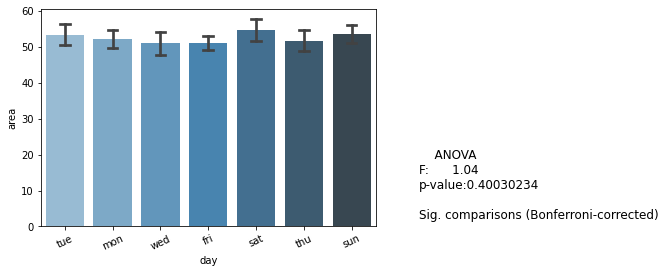

In [ ]:
new_data.drop(new_data.loc[new_data['area']==0].index, inplace=True)
num_num_stats_vis(new_data, 'area')
anova_test_viz(new_data, 'area')